In [1]:
import numpy as np
import math
import h5py
import matplotlib.pyplot as plt

In [2]:
from galaxy import Galaxy

In [3]:
h = h5py.File('Sample.01.Redshift.0.000.h5', 'r')

Box = int(h.attrs["Box"])
Ngalaxies = int(h.attrs["Ngalaxies"])
Redshift = h.attrs["Redshift"]

In [4]:
x = np.real(h.get('x'))
y = np.real(h.get('y'))
z = np.real(h.get('z'))
M = np.real(h.get('Mvir'))
SM = np.real(h.get('StellarMass'))
SFR = np.real(h.get('StarFormationRate'))
ID = np.int_(h.get('CentralObject'))

In [5]:
print(Ngalaxies)

44575694


In [9]:
galaxies = []

for i in range(Ngalaxies):
    g = Galaxy(x[i], y[i], z[i],
               M[i], SM[i], SFR[i], ID[i])
    galaxies.append(g)
    if (i+1) % 1000000 == 0:
        print(f"Processed {(i+1)/Ngalaxies*100:.2f}% galaxies")

Processed 2.24% images
Processed 4.49% images
Processed 6.73% images
Processed 8.97% images
Processed 11.22% images
Processed 13.46% images
Processed 15.70% images
Processed 17.95% images
Processed 20.19% images
Processed 22.43% images
Processed 24.68% images
Processed 26.92% images
Processed 29.16% images
Processed 31.41% images
Processed 33.65% images
Processed 35.89% images
Processed 38.14% images
Processed 40.38% images
Processed 42.62% images
Processed 44.87% images
Processed 47.11% images
Processed 49.35% images
Processed 51.60% images
Processed 53.84% images
Processed 56.08% images
Processed 58.33% images
Processed 60.57% images
Processed 62.81% images
Processed 65.06% images
Processed 67.30% images
Processed 69.54% images
Processed 71.79% images
Processed 74.03% images
Processed 76.27% images
Processed 78.52% images
Processed 80.76% images
Processed 83.00% images
Processed 85.25% images
Processed 87.49% images
Processed 89.74% images
Processed 91.98% images
Processed 94.22% ima

In [22]:
plt_x = []
plt_y = []
plt_s = []
for i in range(Ngalaxies):
    if galaxies[i].z >= 0 and galaxies[i].z <= 10:
        plt_x.append(galaxies[i].x)
        plt_y.append(galaxies[i].y)
        plt_s.append(galaxies[i].SM/(10**13))
    if (i+1) % 1000000 == 0:
        print(f"Processed {(i+1)/Ngalaxies*100:.2f}% galaxies")

Processed 2.24% galaxies
Processed 4.49% galaxies
Processed 6.73% galaxies
Processed 8.97% galaxies
Processed 11.22% galaxies
Processed 13.46% galaxies
Processed 15.70% galaxies
Processed 17.95% galaxies
Processed 20.19% galaxies
Processed 22.43% galaxies
Processed 24.68% galaxies
Processed 26.92% galaxies
Processed 29.16% galaxies
Processed 31.41% galaxies
Processed 33.65% galaxies
Processed 35.89% galaxies
Processed 38.14% galaxies
Processed 40.38% galaxies
Processed 42.62% galaxies
Processed 44.87% galaxies
Processed 47.11% galaxies
Processed 49.35% galaxies
Processed 51.60% galaxies
Processed 53.84% galaxies
Processed 56.08% galaxies
Processed 58.33% galaxies
Processed 60.57% galaxies
Processed 62.81% galaxies
Processed 65.06% galaxies
Processed 67.30% galaxies
Processed 69.54% galaxies
Processed 71.79% galaxies
Processed 74.03% galaxies
Processed 76.27% galaxies
Processed 78.52% galaxies
Processed 80.76% galaxies
Processed 83.00% galaxies
Processed 85.25% galaxies
Processed 87.49%

<IPython.core.display.Javascript object>


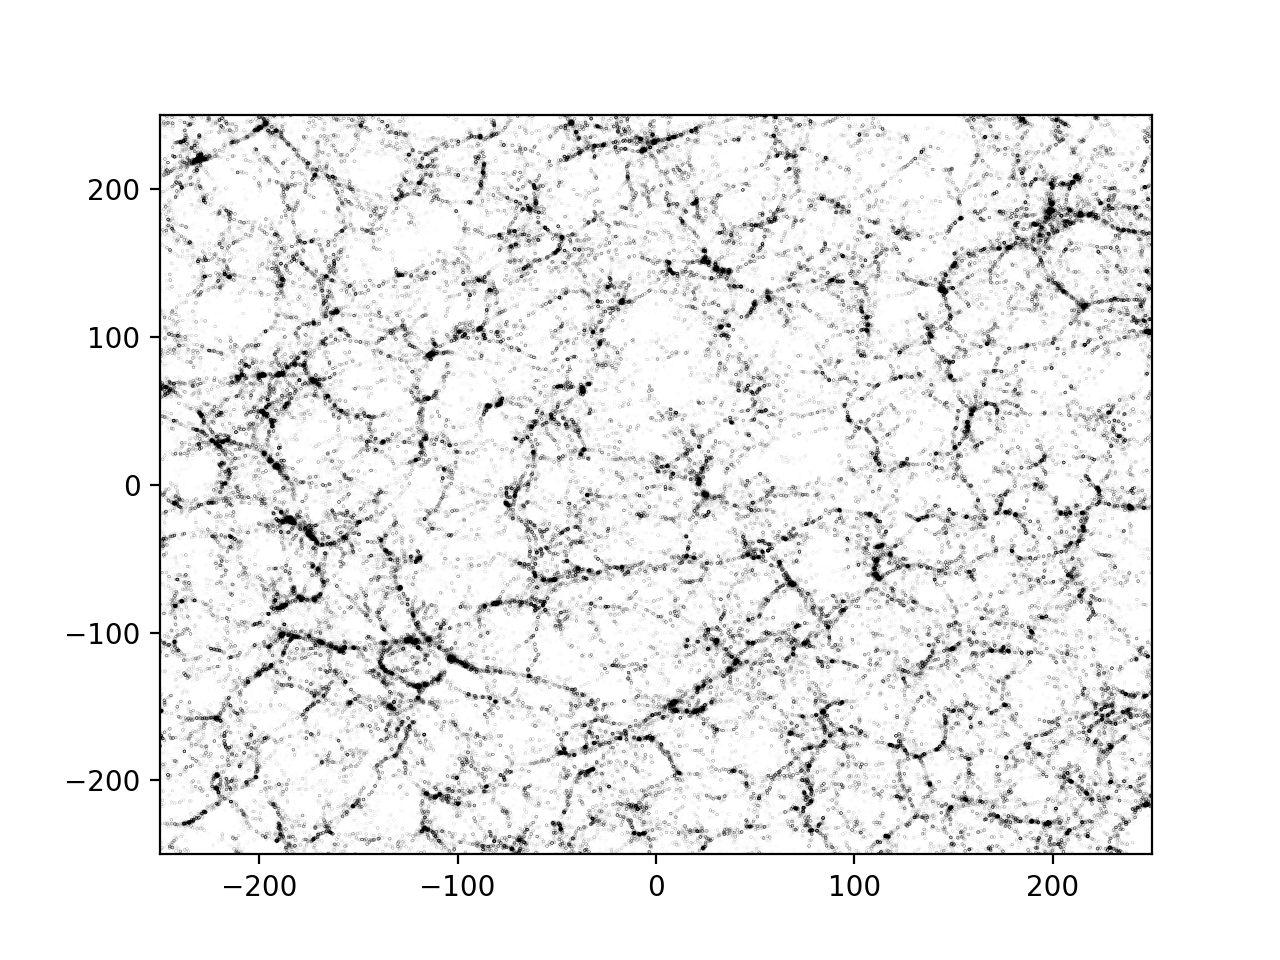

In [25]:
%matplotlib notebook
plt.scatter(plt_x, plt_y, s=plt_s, c ='black')
plt.xlim(-250, 250)
plt.ylim(-250, 250)
plt.show()

In [24]:
print(max(x))

374.99988
